In [244]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings                                                                 
warnings.filterwarnings('ignore') 

# allow plots to appear directly in the notebook
%matplotlib inline

from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


In [245]:
av= pd.read_csv('avocado.csv')
av

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [246]:
av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [247]:
av.dropna(axis = 0, how = 'all', inplace = True)
av

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [248]:
av.drop('Unnamed: 0', axis=1,inplace = True)
av

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [249]:
av.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 165.9+ KB


In [250]:
av.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [251]:
av.apply(lambda x : len(x.unique()))

Date             104
AveragePrice     113
Total Volume    1517
4046            1517
4225            1517
4770            1516
Total Bags      1517
Small Bags      1517
Large Bags      1377
XLarge Bags      711
type               1
year               2
region            51
dtype: int64

In [252]:
for col in av.columns:
    if av[col].dtype=="object":
        print("column name is: {} and number of distinct values: {}".format(col,len(av[col].value_counts())))
        print()

column name is: Date and number of distinct values: 104

column name is: type and number of distinct values: 1

column name is: region and number of distinct values: 51



In [253]:
av["type"].unique()

array(['conventional'], dtype=object)

In [254]:
#type columnn has only one value throughout the dataset so it will not help us in any way so lets drop
av.drop(columns=["type"],inplace=True)

In [255]:
av.year.unique()

array([2015., 2016.])

In [256]:
av.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [257]:
av.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'region'],
      dtype='object')

In [258]:
av.shape

(1517, 12)

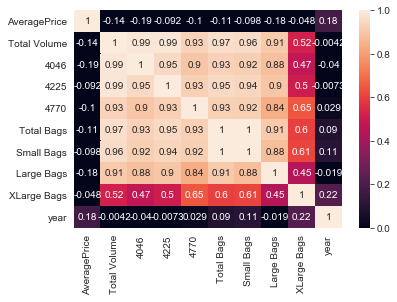

In [259]:
sns.heatmap(av.corr(),vmax = 1, vmin = 0,annot = True)
plt.show()

In [260]:
av.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


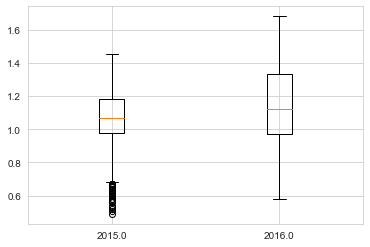

In [261]:
datayear = []
for i in av.year.unique():
    datayear.append(av[av.year == i].AveragePrice)
plt.boxplot(datayear)
plt.xticks(range(1,av.year.nunique()+1),av.year.unique())
plt.show()

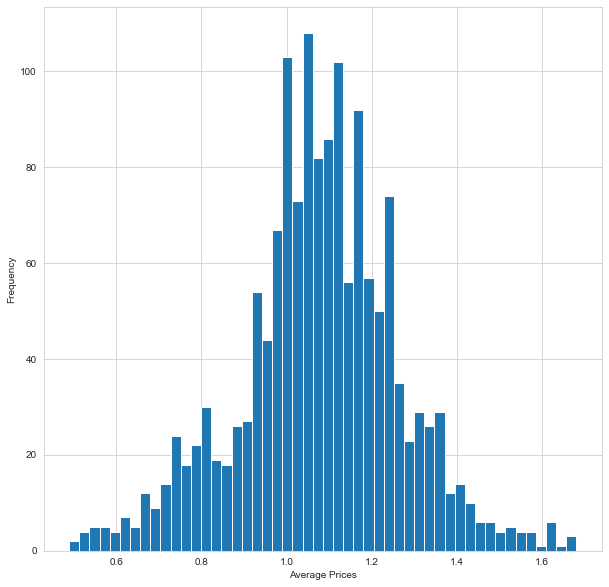

In [262]:
av.AveragePrice.plot(kind = 'hist',bins = 50,figsize = (10,10))
plt.xlabel("Average Prices")
plt.ylabel("Frequency")
plt.show()

In [263]:
av_2015=av[av.year==2015]
av_2016=av[av.year==2016]
price_2015=[i for i in av_2015.AveragePrice if i > av_2015.AveragePrice.mean()]
price_2016=[i for i in av_2016.AveragePrice if i > av_2016.AveragePrice.mean()]
print("prices which are higher than average prices in year 2015 :",len(price_2015))
print("prices which are higher than average prices in year 2016 :",len(price_2016))

prices which are higher than average prices in year 2015 : 664
prices which are higher than average prices in year 2016 : 108


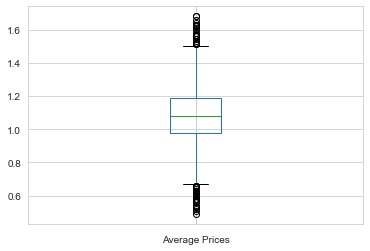

In [264]:
av.boxplot(column="AveragePrice")
av.T.boxplot(vert=True)
plt.xlabel("Average Prices")
plt.show()

In [265]:
#Sorting Average Prices by states
avsorted=av.groupby("region").mean()
avsorted=avsorted.sort_values("AveragePrice",ascending=False)

Text(0.5, 1.0, 'Average Prices by regions')

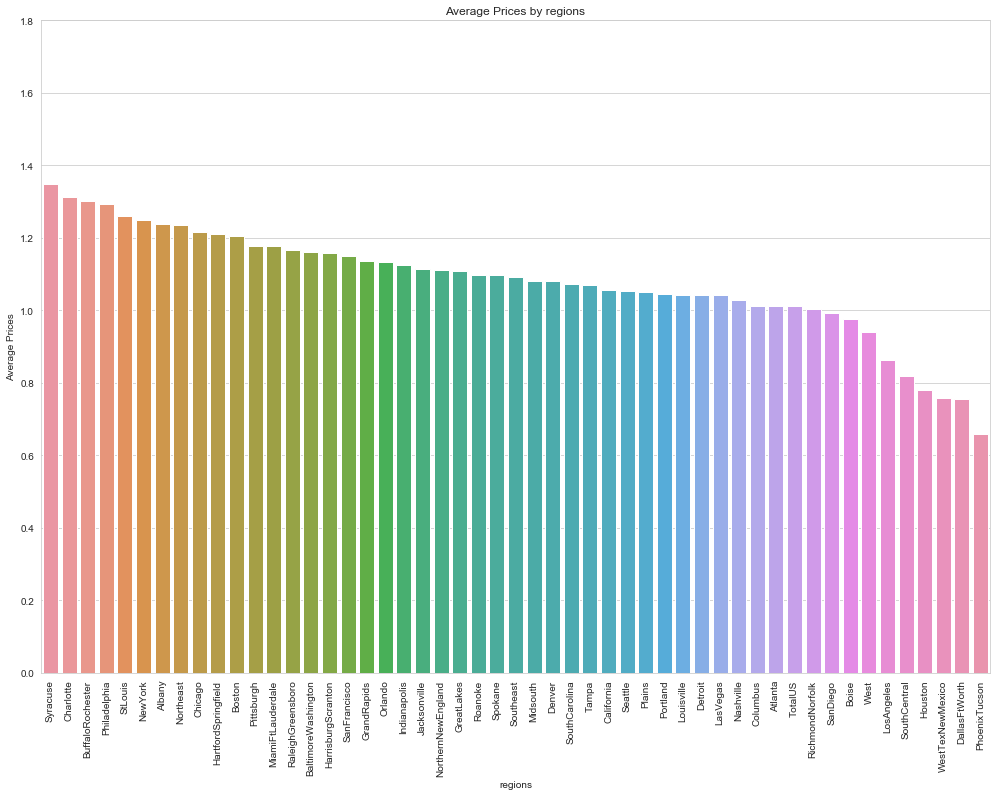

In [266]:
#visualization
plt.figure(figsize=(17,12))
sns.barplot(x=avsorted.index,y=avsorted.AveragePrice)
plt.xticks(rotation= 90)
plt.xlabel('regions')
plt.ylim(0,1.8)
plt.ylabel('Average Prices')
plt.title('Average Prices by regions')

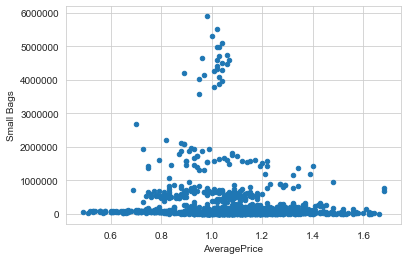

In [267]:
av.plot(kind="scatter",x="AveragePrice",y="Small Bags")
plt.show()

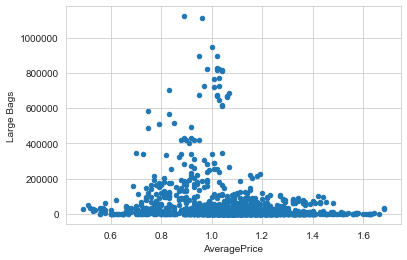

In [268]:
av.plot(kind="scatter",x="AveragePrice",y="Large Bags")
plt.show()

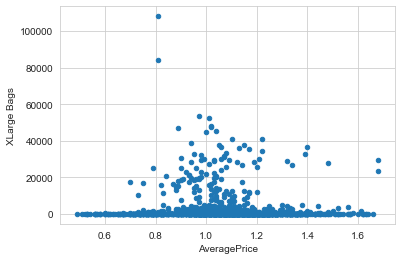

In [269]:
av.plot(kind="scatter",x="AveragePrice",y="XLarge Bags")
plt.show()

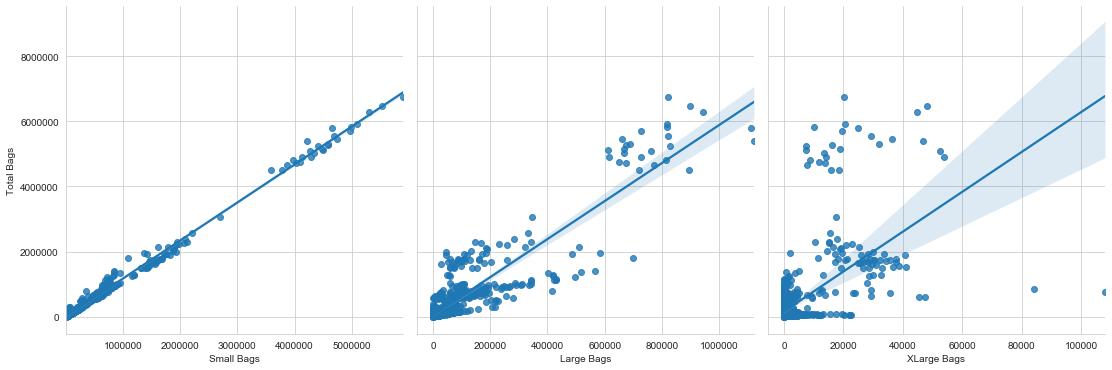

In [270]:
sns.pairplot(av, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Bags', size=5, aspect=1, kind='reg')

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

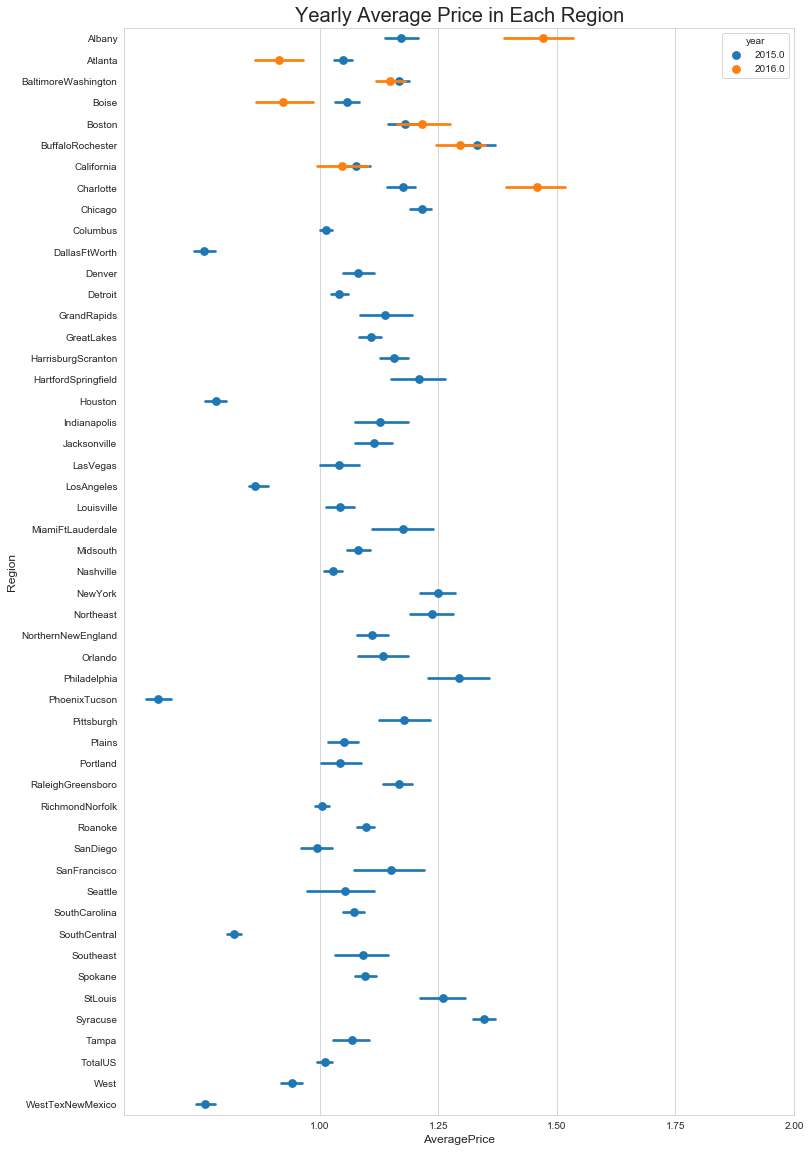

In [271]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=av, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.ylabel('Region',{'fontsize' : 'large'})
plt.xlabel('AveragePrice',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

In [272]:
#Predicting Average Price of Avocado

In [273]:
av_m=av[[ 'AveragePrice','Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags','XLarge Bags']]
av_m

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00
...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00


In [274]:
scaler = StandardScaler().fit(av_m)
av_s = scaler.transform(av_m)
av_avocado = pd.DataFrame(av_s)
av_avocado.columns = ['AveragePrice','Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags','XLarge Bags']
av_avocado

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.350481,-0.346966,-0.331490,-0.333053,-0.365608,-0.375994,-0.371055,-0.360044,-0.292727
1,1.456397,-0.349078,-0.331676,-0.338923,-0.365534,-0.374927,-0.369812,-0.360008,-0.292727
2,-0.767838,-0.334785,-0.331614,-0.300348,-0.365010,-0.376722,-0.371922,-0.359960,-0.292727
3,0.026531,-0.343636,-0.331441,-0.322576,-0.365431,-0.379802,-0.375576,-0.359701,-0.292727
4,1.085691,-0.349944,-0.331539,-0.339401,-0.365408,-0.379310,-0.375098,-0.359160,-0.292727
...,...,...,...,...,...,...,...,...,...
1512,1.668229,-0.318397,-0.302475,-0.331910,-0.238672,-0.309055,-0.308916,-0.273213,-0.260489
1513,2.303724,-0.321242,-0.309770,-0.334407,-0.224966,-0.303931,-0.299831,-0.288090,-0.292727
1514,2.144850,-0.321203,-0.308209,-0.333987,-0.244443,-0.305099,-0.301950,-0.290953,-0.182037
1515,2.091892,-0.318784,-0.304230,-0.333568,-0.238936,-0.303098,-0.298364,-0.290783,-0.292727


In [275]:
X=av_avocado[[ 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags','XLarge Bags']] #feature columns
y=av_avocado.AveragePrice #predictor variable

In [276]:
def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [277]:
print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (1213, 8)
Y Train Shape  (1213,)
X Test Shape  (304, 8)
Y Test Shape  (304,)


In [278]:
#Using Linear Regression model
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg
linreg = linear_reg(X,y)

In [279]:
linreg.score(X,y)

0.15107455558791638

In [280]:
print('Intercept:',linreg.intercept_)                                           # print the intercept 
print('Coefficients:',linreg.coef_)

Intercept: 0.014791851611903002
Coefficients: [-0.0610201  -1.00788708  0.94928999  0.01232602  0.13548222  0.22586461
 -0.36351349 -0.07734895]


In [281]:
feature_cols = ['Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags','XLarge Bags']
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)

In [282]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 0.014791851611903002
Total Volume -0.06102010427379633
4046 -1.0078870763029177
4225 0.9492899871369584
4770 0.012326016351821609
Total Bags 0.13548222099954726
Small Bags 0.22586460854780868
Large Bags -0.3635134931512723
XLarge Bags -0.0773489450078077


In [283]:
y_pred_train = linreg.predict(X_train)

In [284]:
y_pred_test = linreg.predict(X_test)

In [285]:
#Calculating Mean Absolute error, Mean Squared error, Root Mean Squared error
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

print('----------------------------------------------------------------------------------------')

MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

print('----------------------------------------------------------------------------------------')

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

MAE for training set is 0.7022782196021451
MAE for test set is 0.6653271940335154
----------------------------------------------------------------------------------------
MSE for training set is 0.8618942095590181
MSE for test set is 0.7971783650593508
----------------------------------------------------------------------------------------
RMSE for training set is 0.9283825771518001
RMSE for test set is 0.8928484558195476


In [286]:
#we can conclude that RMSE is greater than MSE.

In [287]:
print("Model Evaluation for Linear Regression Model")

print('----------------------------------------------------------------------------------------')

yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for train data ",r_squared, " and adjusted_r_squared for train data",adjusted_r_squared)

print('----------------------------------------------------------------------------------------')

yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

Model Evaluation for Linear Regression Model
----------------------------------------------------------------------------------------
r_squared for train data  0.13515154851190014  and adjusted_r_squared for train data 0.12940504717310874
----------------------------------------------------------------------------------------
r_squared for test data  0.21040483854067293  and adjusted_r_squared for test data 0.18899208839940307


In [288]:
#Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(random_state = 0)
model2.fit(X_train, y_train)
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test) 

In [289]:
#Model Evaluation for Random Forest Regressor
print("Model Evaluation for Random Forest Regressor ")
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train),' and RMSE for test set is {}'.format(RMSE_test))

print('----------------------------------------------------------------------------------------')

yhat = model2.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for train data ",r_squared, " and adjusted_r_squared for train data",adjusted_r_squared)

print('----------------------------------------------------------------------------------------')

yhat = model2.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

Model Evaluation for Random Forest Regressor 
RMSE for training set is 0.1773483705150649  and RMSE for test set is 0.4018510694469823
----------------------------------------------------------------------------------------
r_squared for train data  0.9684397485901246  and adjusted_r_squared for train data 0.9682300459229494
----------------------------------------------------------------------------------------
r_squared for test data  0.8400518462115767  and adjusted_r_squared for test data 0.8357142691596873


***